## Results of the Mean Imputation Data
<hr/>

</h3>We considered the data which has mean imputation techniques used where all the values are dropped off....</h3>


<h4>        Aims and Goals of this Experiment</h4>
<ul>
    <li> What are MAPE and MAE scores of train and test data </li>
    <li> Levraging SARIMA models to capture seasonal difference </li>
</ul>
    

In [1]:
import pandas as pd
import numpy as np
import joblib
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df1 = pd.read_csv("../../../../main/sub_data/single_variant/mean/sin_ndlc_psp_mean.csv",index_col='Date',parse_dates=True)
# Reading the First Difference Data
df2 = pd.read_csv("../../../../main/sub_data/single_variant/mean/sin_ndlc_psp_mean_diff1.csv",index_col='Date',parse_dates=True)
# Reading the Second Difference Data
df3 = pd.read_csv("../../../../main/sub_data/single_variant/mean/sin_ndlc_psp_mean_diff2.csv",index_col='Date',parse_dates=True)

In [3]:
df1 = df1.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)
df1

Max.Demand met during the day (MW)
Date                                          
2013-04-01                              2776.0
2013-04-02                              3034.0
2013-04-03                              2991.0
2013-04-04                              3125.0
2013-04-05                              3160.0
...                                        ...
2023-05-27                              5051.0
2023-05-28                              4780.0
2023-05-29                              4782.0
2023-05-30                              4871.0
2023-05-31                              4462.0

[3713 rows x 1 columns]

In [4]:
df2.head()

Max.Demand met during the day (MW)
Date                                          
2013-04-02                               258.0
2013-04-03                               -43.0
2013-04-04                               134.0
2013-04-05                                35.0
2013-04-06                                -7.0

In [5]:
df3.head()

Max.Demand met during the day (MW)
Date                                          
2013-04-03                              -301.0
2013-04-04                               177.0
2013-04-05                               -99.0
2013-04-06                               -42.0
2013-04-07                               -91.0

## We first Divide our data into train and Test data

In [6]:
df1_train = df1.loc[:'2023-04-30']
df1_test = df1.loc['2023-05-01':]
df1_train.to_csv("../../../../main/sub_data/single_variant/mean/train/train_mean.csv")
df1_test.to_csv("../../../../main/sub_data/single_variant/mean/test/test_mean.csv")

## AR(1) model according to the ACF and PACF plots

In [7]:
def get_MAPE_MAE_test(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(pd.DataFrame(results.forecast(len(actual_values)))["predicted_mean"])
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE

def get_MAPE_MAE(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(results.fittedvalues)
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE



In [8]:
ar1_model = ARIMA(df1_train,order=(1,0,0))
ar1_results = ar1_model.fit()
print(ar1_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(1, 0, 0)   Log Likelihood              -26089.021
Date:                                Sat, 15 Jul 2023   AIC                          52184.042
Time:                                        09:33:30   BIC                          52202.676
Sample:                                    04-01-2013   HQIC                         52190.675
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.4737    109.912     39.591      0.000    4136.051    4566.896
ar.

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
get_MAPE_MAE_test(df1_test,ar1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar1_results)

The MAPE Score is :  19.186271541402313
The MAE Score is : 198.18713888776557
------------------------------------------------------------
The MAPE Score is :  25.749304244036743
The MAE Score is : 198.18713888776557


(25.749304244036743, 198.18713888776557)

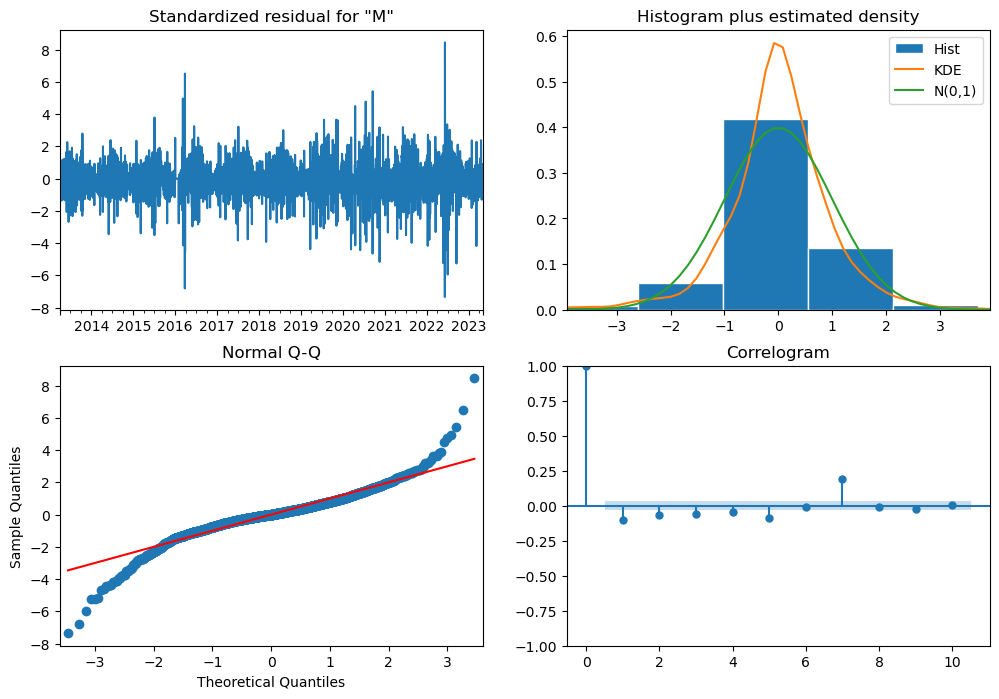

In [10]:
ar1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [11]:
ar2_model = ARIMA(df1_train,order=(2,0,0))
ar2_results = ar2_model.fit()
print(ar2_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(2, 0, 0)   Log Likelihood              -26068.096
Date:                                Sat, 15 Jul 2023   AIC                          52144.192
Time:                                        09:33:32   BIC                          52169.037
Sample:                                    04-01-2013   HQIC                         52153.036
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.4737    125.497     34.674      0.000    4105.504    4597.444
ar.

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [12]:
get_MAPE_MAE_test(df1_test,ar2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar2_results)

The MAPE Score is :  19.352440268762994
The MAE Score is : 198.83576355189535
------------------------------------------------------------
The MAPE Score is :  25.756894042215144
The MAE Score is : 198.83576355189535


(25.756894042215144, 198.83576355189535)

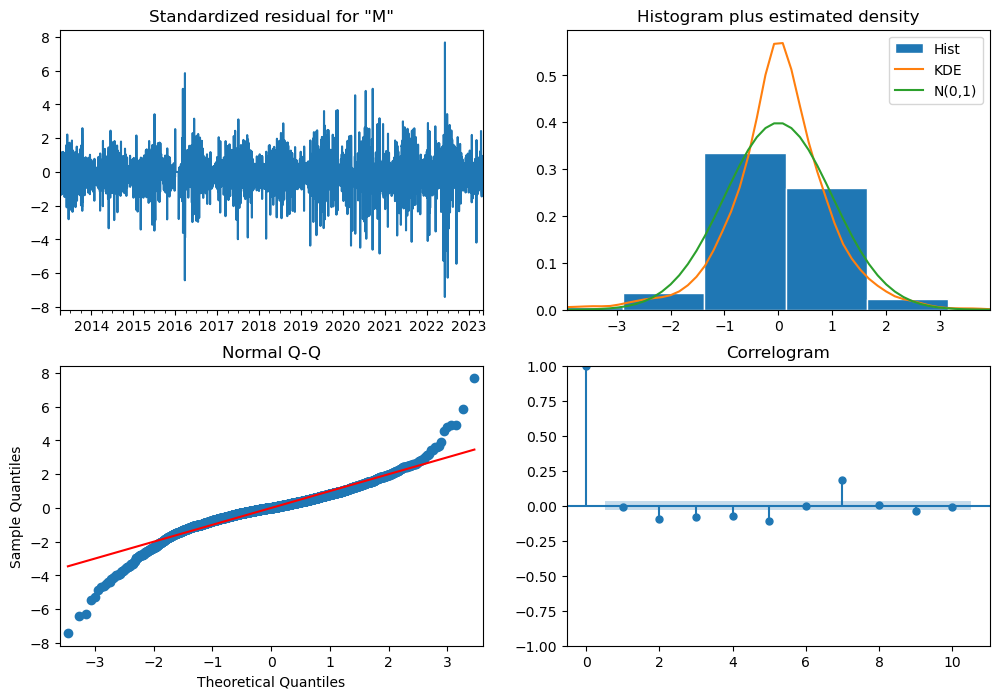

In [13]:
ar2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [14]:
ar3_model = ARIMA(df1_train,order=(1,1,0))
ar3_results = ar3_model.fit()
print(ar3_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(1, 1, 0)   Log Likelihood              -26092.160
Date:                                Sat, 15 Jul 2023   AIC                          52188.319
Time:                                        09:33:33   BIC                          52200.741
Sample:                                    04-01-2013   HQIC                         52192.741
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1258      0.009    -13.283      0.000      -0.144      -0.107
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.6287813844323
The MAE Score is : 200.50809817754455
------------------------------------------------------------
The MAPE Score is :  26.276289009826364
The MAE Score is : 200.50809817754455


(26.276289009826364, 200.50809817754455)

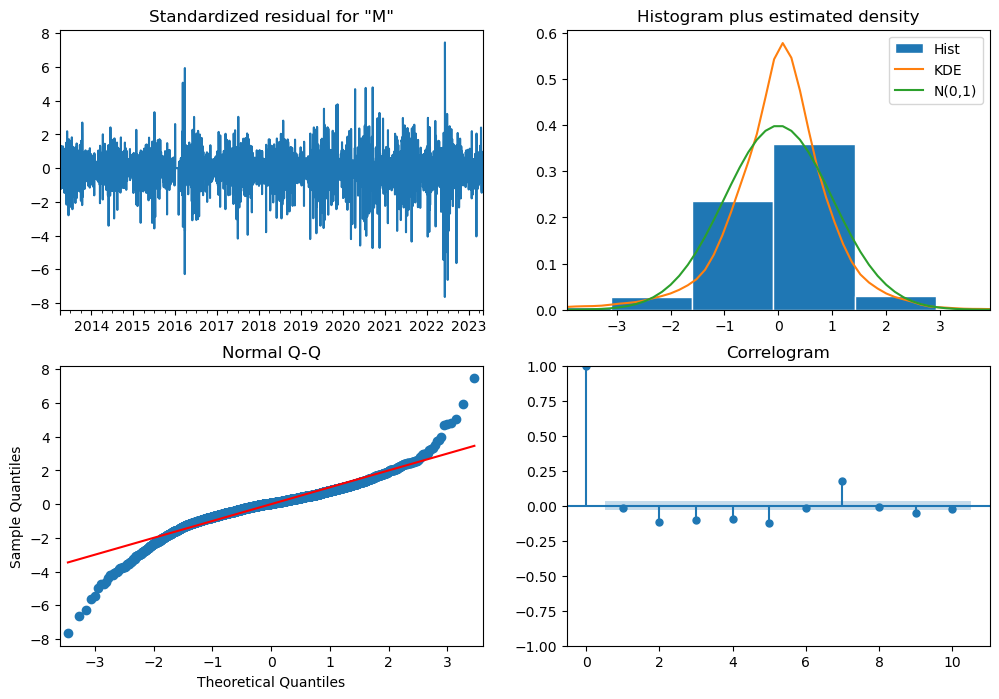

In [16]:
ar3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [17]:
ar4_model = ARIMA(df1,order=(1,2,0))
ar4_results = ar4_model.fit()
print(ar4_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3713
Model:                                 ARIMA(1, 2, 0)   Log Likelihood              -27262.783
Date:                                Sat, 15 Jul 2023   AIC                          54529.566
Time:                                        09:33:34   BIC                          54542.004
Sample:                                    04-01-2013   HQIC                         54533.992
                                         - 05-31-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5161      0.008    -62.657      0.000      -0.532      -0.500
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
get_MAPE_MAE_test(df1_test,ar4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar4_results)

The MAPE Score is :  86.03739934732316
The MAE Score is : 260.4418770750233
------------------------------------------------------------
The MAPE Score is :  27.04628715516695
The MAE Score is : 260.4418770750233


(27.04628715516695, 260.4418770750233)

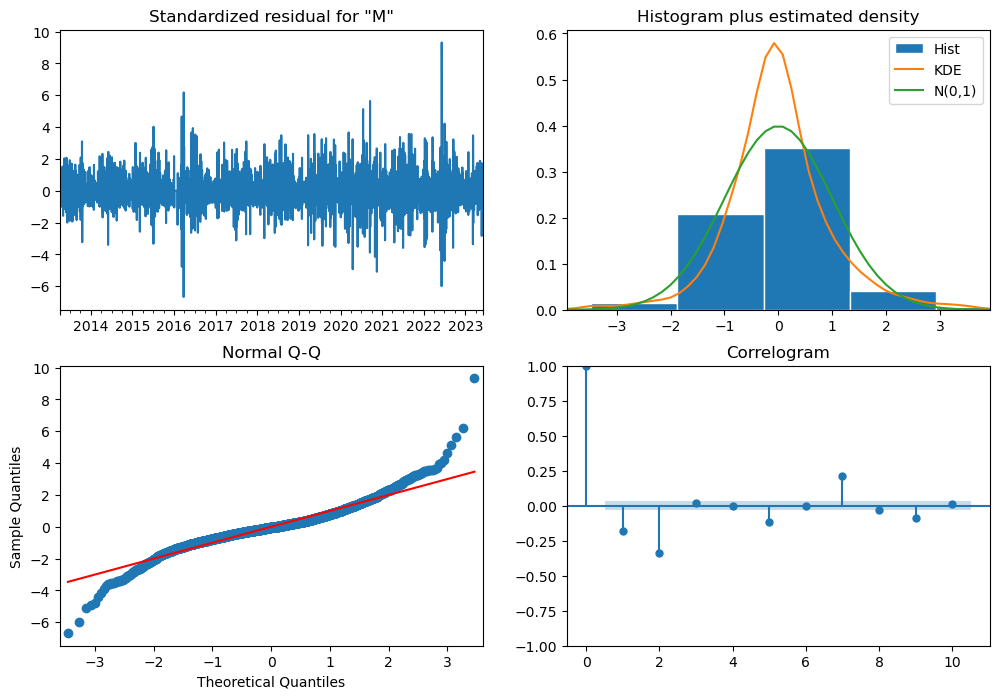

In [19]:
ar4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [20]:
ma1_model = ARIMA(df1_train,order=(0,0,1))
ma1_results = ma1_model.fit()
print(ma1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 0, 1)   Log Likelihood              -28797.367
Date:                                Sat, 15 Jul 2023   AIC                          57600.735
Time:                                        09:33:36   BIC                          57619.368
Sample:                                    04-01-2013   HQIC                         57607.368
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.4131     19.019    228.789      0.000    4314.136    4388.690
ma.

In [21]:
get_MAPE_MAE_test(df1_test,ma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma1_results)

The MAPE Score is :  16.616759956719815
The MAE Score is : 491.0653365425842
------------------------------------------------------------
The MAPE Score is :  21.29074232259104
The MAE Score is : 491.0653365425842


(21.29074232259104, 491.0653365425842)

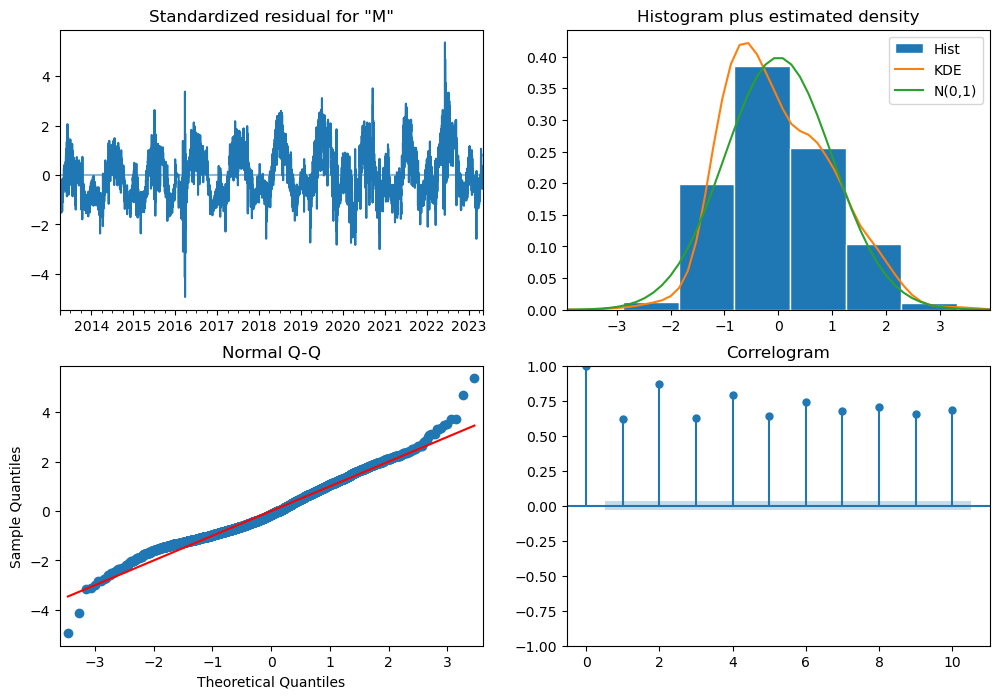

In [22]:
ma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [23]:
ma2_model = ARIMA(df1_train,order=(0,1,1))
ma2_results = ma2_model.fit()
print(ma2_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 1, 1)   Log Likelihood              -26083.522
Date:                                Sat, 15 Jul 2023   AIC                          52171.044
Time:                                        09:33:37   BIC                          52183.466
Sample:                                    04-01-2013   HQIC                         52175.466
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1665      0.010    -16.821      0.000      -0.186      -0.147
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
get_MAPE_MAE_test(df1_test,ma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma2_results)

The MAPE Score is :  21.32247164437814
The MAE Score is : 201.04655135447675
------------------------------------------------------------
The MAPE Score is :  26.24849696402542
The MAE Score is : 201.04655135447675


(26.24849696402542, 201.04655135447675)

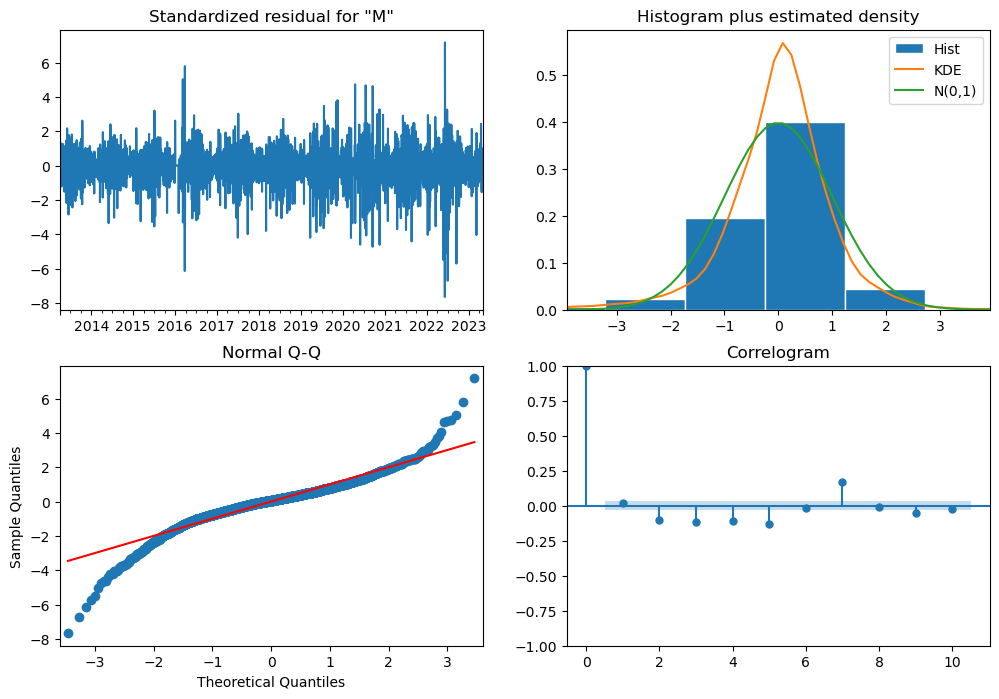

In [25]:
ma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [26]:
ma3_model = ARIMA(df1_train,order=(0,2,1))
ma3_results = ma3_model.fit()
print(ma3_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 2, 1)   Log Likelihood              -26119.823
Date:                                Sat, 15 Jul 2023   AIC                          52243.646
Time:                                        09:33:38   BIC                          52256.067
Sample:                                    04-01-2013   HQIC                         52248.068
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      0.009   -108.410      0.000      -1.018      -0.982
sig

In [27]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.6287813844323
The MAE Score is : 200.50809817754455
------------------------------------------------------------
The MAPE Score is :  26.276289009826364
The MAE Score is : 200.50809817754455


(26.276289009826364, 200.50809817754455)

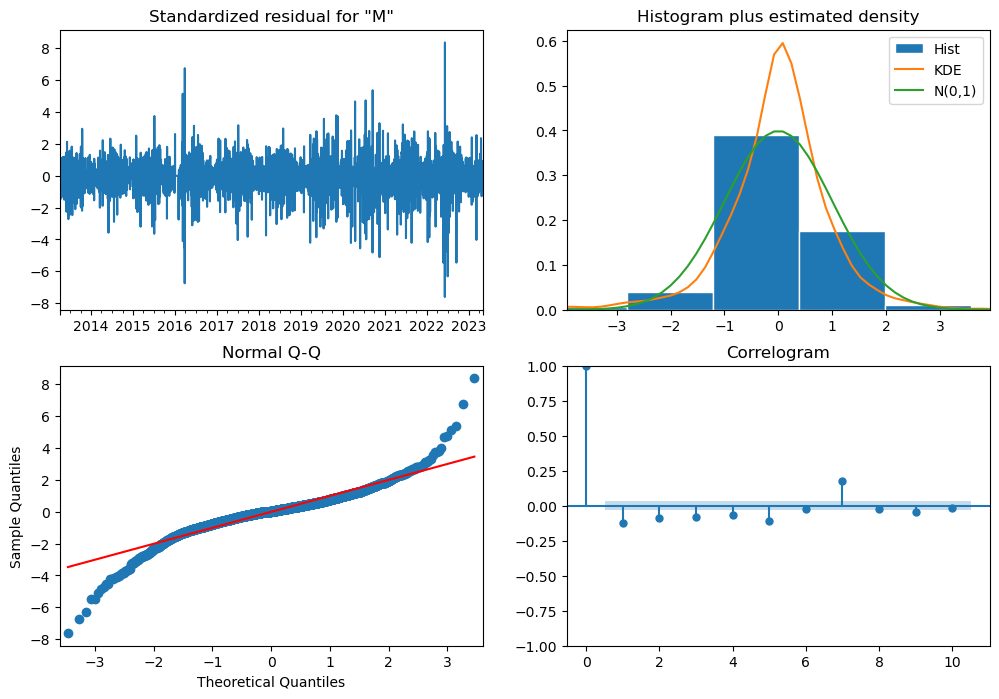

In [28]:
ma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

## ARMA Models through AIC and BIC scores

In [29]:
# arma_results1 = []
# for p in range(10):
#     for q in range(10):
#         try:
#             results = ARIMA(df1,order=(p,0,q)).fit()
#             arma_results1.append((p,q,results.aic,results.bic))
#         except:
#             arma_results1.append((p,q,None,None))
arma_results1 = pd.read_csv("arma_results1.csv")

In [30]:
arma_results1 = pd.DataFrame(arma_results1,columns=['p','q','AIC','BIC'])
arma_results1.sort_values('AIC')

p  q           AIC           BIC
98  9  8  52092.654821  52210.827135
89  8  9  52117.487555  52235.659869
88  8  8  52117.642949  52229.595667
99  9  9  52136.926266  52261.318175
97  9  7  52159.004113  52270.956831
.. .. ..           ...           ...
4   0  4  54320.894348  54358.211921
3   0  3  55183.310636  55214.408613
2   0  2  56060.378606  56085.256988
1   0  1  58087.231843  58105.890629
0   0  0  61722.342173  61734.781364

[100 rows x 4 columns]

In [31]:
arma_results1.sort_values('BIC')
arma_results1.to_csv("arma_results1.csv")

In [32]:
arma1_results = ARIMA(df1_train,order=(9,0,8)).fit()
print(arma1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 0, 8)   Log Likelihood              -25798.649
Date:                                Sat, 15 Jul 2023   AIC                          51635.298
Time:                                        09:36:28   BIC                          51753.311
Sample:                                    04-01-2013   HQIC                         51677.307
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.4738    809.105      5.378      0.000    2765.657    5937.291
ar.

In [33]:
get_MAPE_MAE_test(df1_test,arma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma1_results)

The MAPE Score is :  18.266389145237714
The MAE Score is : 180.57576751476708
------------------------------------------------------------
The MAPE Score is :  26.02754817028496
The MAE Score is : 180.57576751476708


(26.02754817028496, 180.57576751476708)

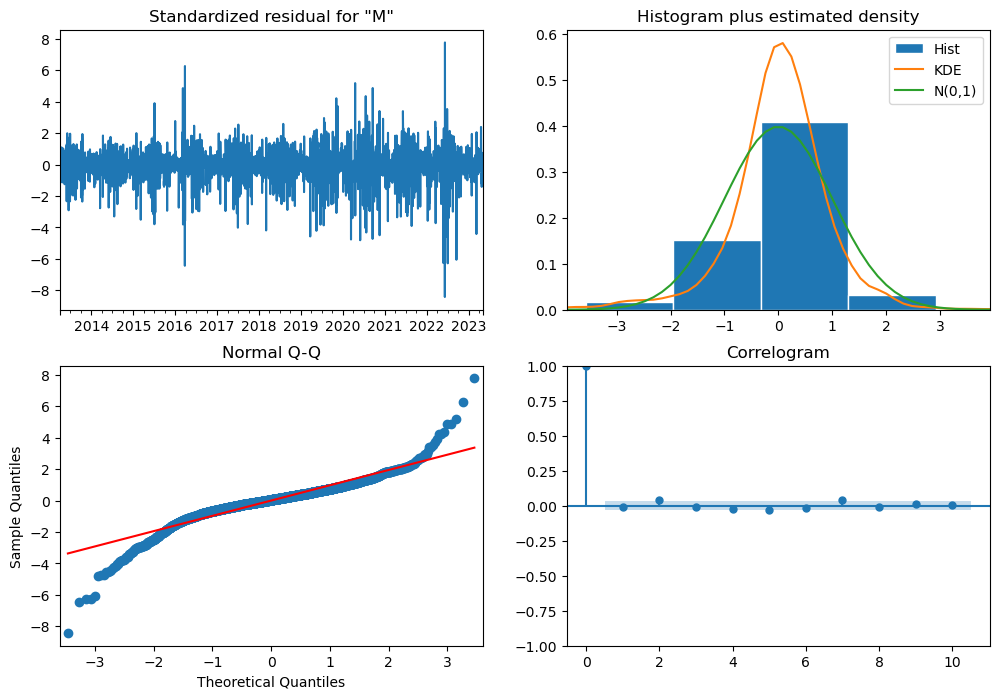

In [34]:
arma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [35]:
arma2_results = ARIMA(df1_train,order=(9,1,8)).fit()
print(arma2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 1, 8)   Log Likelihood              -25825.872
Date:                                Sat, 15 Jul 2023   AIC                          51687.745
Time:                                        09:40:38   BIC                          51799.541
Sample:                                    04-01-2013   HQIC                         51727.541
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4329      0.083      5.230      0.000       0.271       0.595
ar.

In [36]:
get_MAPE_MAE_test(df1_test,arma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma2_results)

The MAPE Score is :  18.069990719417525
The MAE Score is : 184.90588055194692
------------------------------------------------------------
The MAPE Score is :  26.13530904570098
The MAE Score is : 184.90588055194692


(26.13530904570098, 184.90588055194692)

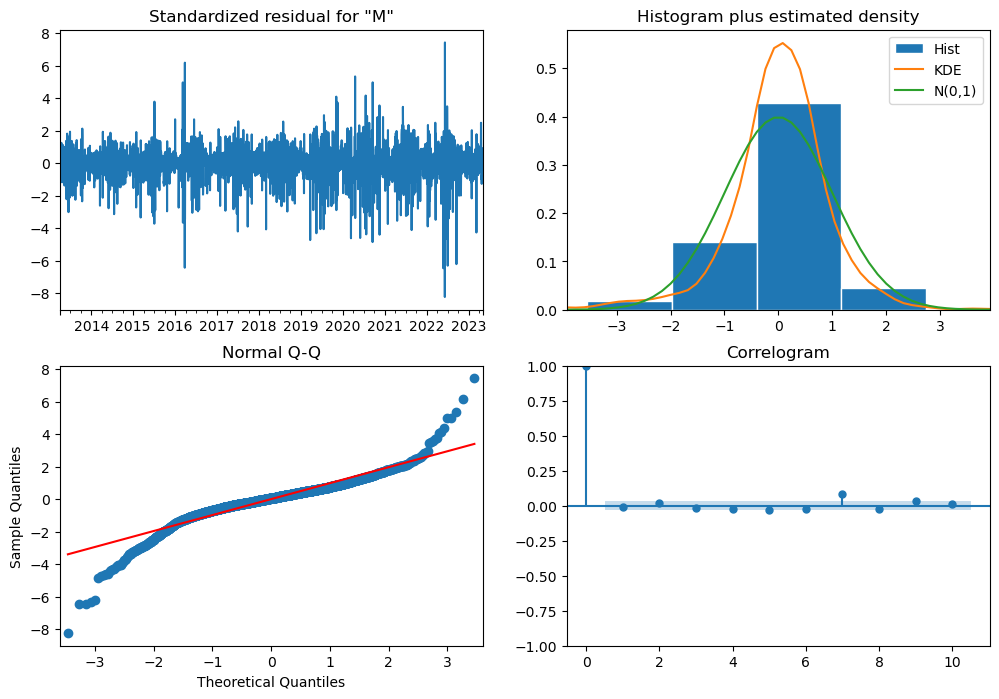

In [37]:
arma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [38]:
arma3_results = ARIMA(df1_train,order=(8,0,9)).fit()
print(arma3_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 0, 9)   Log Likelihood              -25812.695
Date:                                Sat, 15 Jul 2023   AIC                          51663.391
Time:                                        09:45:08   BIC                          51781.404
Sample:                                    04-01-2013   HQIC                         51705.400
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.4738    577.729      7.532      0.000    3219.147    5483.801
ar.

In [39]:
get_MAPE_MAE_test(df1_test,arma3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma3_results)

The MAPE Score is :  18.400678908956923
The MAE Score is : 182.06396392059875
------------------------------------------------------------
The MAPE Score is :  25.965564662439817
The MAE Score is : 182.06396392059875


(25.965564662439817, 182.06396392059875)

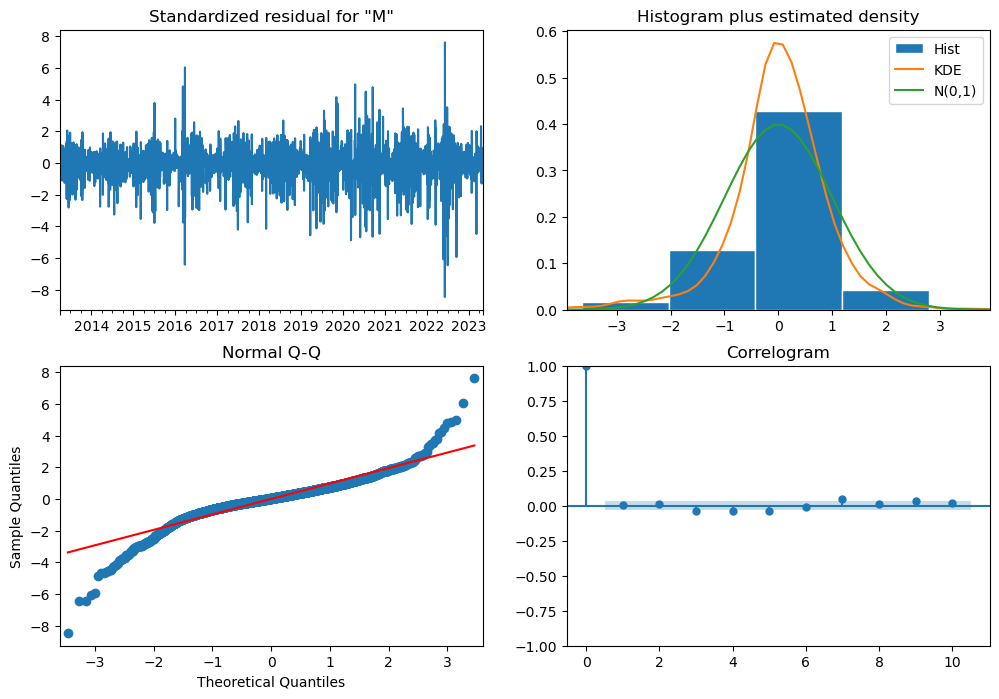

In [40]:
arma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [41]:
arma4_results = ARIMA(df1_train,order=(8,1,9)).fit()
print(arma4_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 1, 9)   Log Likelihood              -25829.961
Date:                                Sat, 15 Jul 2023   AIC                          51695.921
Time:                                        09:51:03   BIC                          51807.718
Sample:                                    04-01-2013   HQIC                         51735.718
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4746      0.078      6.073      0.000       0.321       0.628
ar.

In [42]:
get_MAPE_MAE_test(df1_test,arma4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma4_results)

The MAPE Score is :  18.36640981125599
The MAE Score is : 184.2910531120413
------------------------------------------------------------
The MAPE Score is :  26.173822613163416
The MAE Score is : 184.2910531120413


(26.173822613163416, 184.2910531120413)

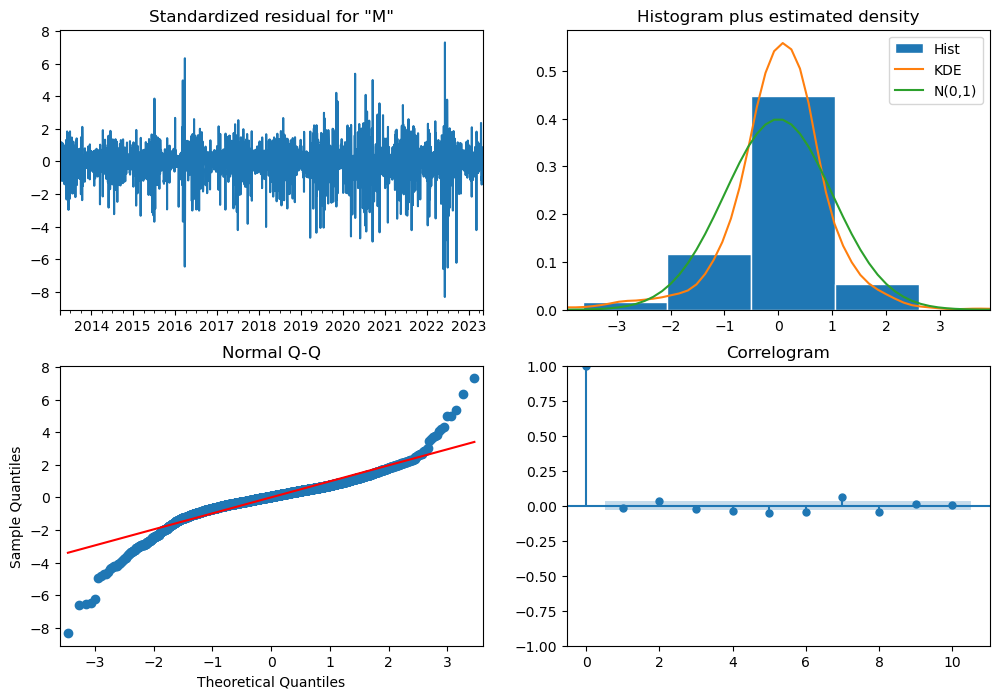

In [43]:
arma4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [44]:
arma5_results = ARIMA(df1_train,order=(8,0,8)).fit()
print(arma5_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 0, 8)   Log Likelihood              -25817.093
Date:                                Sat, 15 Jul 2023   AIC                          51670.186
Time:                                        09:55:24   BIC                          51781.988
Sample:                                    04-01-2013   HQIC                         51709.984
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.4738    613.707      7.090      0.000    3148.631    5554.316
ar.

In [45]:
get_MAPE_MAE_test(df1_test,arma5_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma5_results)

The MAPE Score is :  18.518080413302577
The MAE Score is : 181.67060267269852
------------------------------------------------------------
The MAPE Score is :  25.977314278705062
The MAE Score is : 181.67060267269852


(25.977314278705062, 181.67060267269852)

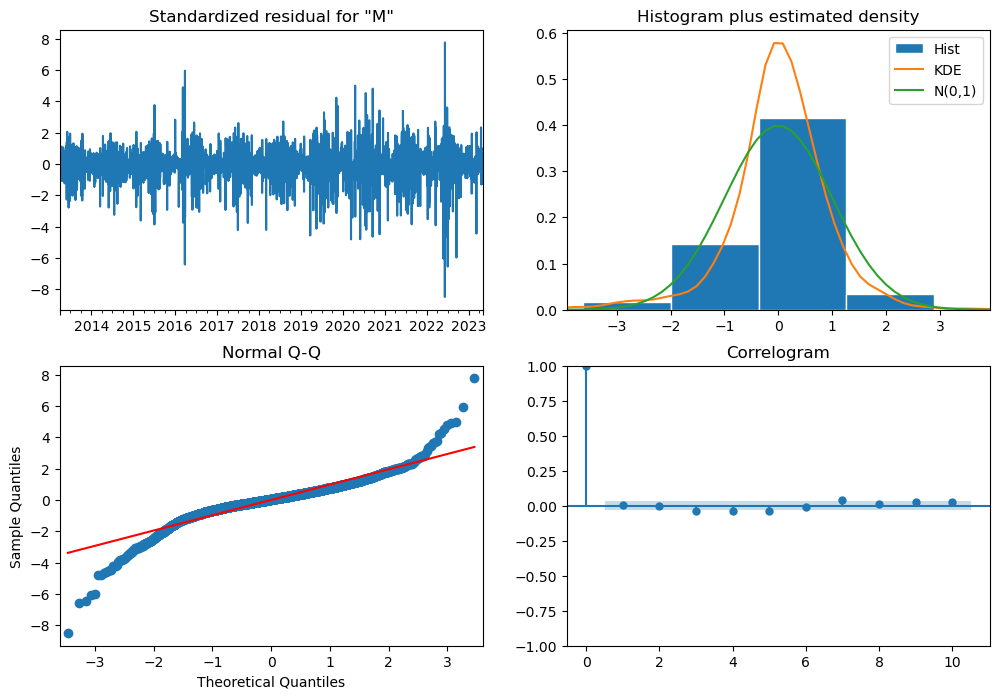

In [46]:
arma5_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [47]:
arma6_results = ARIMA(df1_train,order=(8,1,8)).fit()
print(arma6_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 1, 8)   Log Likelihood              -25801.697
Date:                                Sat, 15 Jul 2023   AIC                          51637.395
Time:                                        09:59:32   BIC                          51742.981
Sample:                                    04-01-2013   HQIC                         51674.981
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1909      0.884      0.216      0.829      -1.542       1.924
ar.

In [48]:
get_MAPE_MAE_test(df1_test,arma6_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma6_results)

The MAPE Score is :  18.32481314298223
The MAE Score is : 181.71403209504177
------------------------------------------------------------
The MAPE Score is :  26.093470686837644
The MAE Score is : 181.71403209504177


(26.093470686837644, 181.71403209504177)

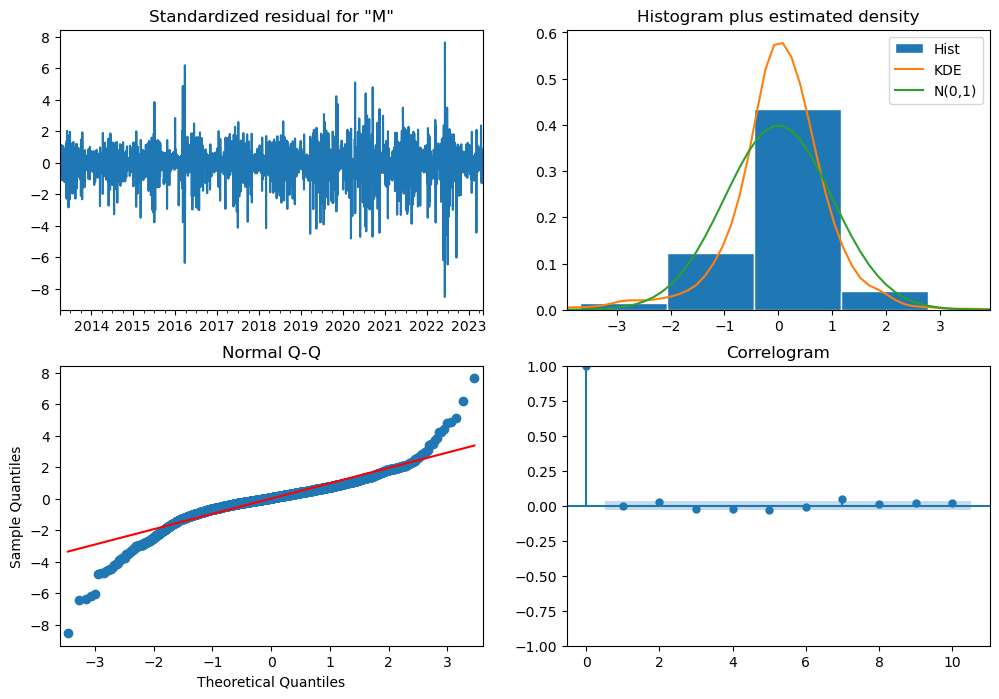

In [49]:
arma6_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [50]:
# Create auto_arima model
model1 = pm.auto_arima(df1_train,
                      seasonal=True, 
                      error_action='ignore',
                      suppress_warnings=True)

# Create auto_arima model
model2 = pm.auto_arima(df1_train,
                      seasonal=False, 
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())
print(model2.summary())



/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  ret

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3682
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -25901.235
Date:                Sat, 15 Jul 2023   AIC                          51820.469
Time:                        10:31:30   BIC                          51876.368
Sample:                    04-01-2013   HQIC                         51840.368
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1840      0.028      6.495      0.000       0.128       0.239
ar.L2         -0.6717      0.022    -30.964      0.000      -0.714      -0.629
ar.L3          0.5133      0.037     13.808      0.0

In [51]:
model1 = ARIMA(df1_train,order=(5,1,3)).fit()

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

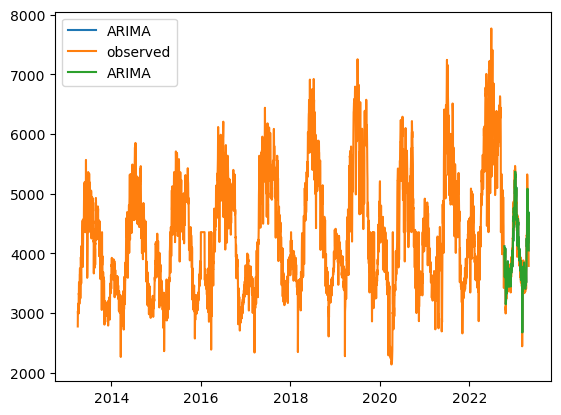

In [52]:
# Create ARIMA mean forecast
arima_pred = model1.get_prediction(start=-200)
arima_mean = arima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.plot(df1_train.index,df1_train["Max.Demand met during the day (MW)"], label='observed')
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.legend()
plt.show()

In [53]:
get_MAPE_MAE_test(df1_test,model1)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,model1)

The MAPE Score is :  18.563991100714226
The MAE Score is : 191.31549840089613
------------------------------------------------------------
The MAPE Score is :  26.08563134189237
The MAE Score is : 191.31549840089613


(26.08563134189237, 191.31549840089613)